In [1]:
import pandas as pd
import numpy as np
import pyfpgrowth
import matplotlib
import matplotlib.pyplot as plt
import collections
import itertools
import operator
import random
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.pyplot import figure

In [2]:
#Lire le fichier Csv et preparer les differentes bases de transaction des differents pays
df = pd.read_csv('data.csv', sep=',',encoding="ISO-8859-1")
df = df.fillna(0)
df = df.astype({"CustomerID": int})



#Determiner Les pays qui existe dans la base de transaction.
CountryList = list(set(df['Country']))
CountryList = CountryList[1:len(CountryList)]
for i in range (0,len(CountryList)) :
    if(CountryList[i]=='United Kingdom'): UnitedKingdomSales = df[df['Country'] == 'United Kingdom']
    if(CountryList[i]=='France'): FranceSales = df[df['Country'] == 'France']
    if(CountryList[i]=='Switzerland'): SwitzerlandSales = df[df['Country'] == 'Switzerland']
    if(CountryList[i]=='Norway'): NorwaySales = df[df['Country'] == 'Norway']
    if(CountryList[i]=='Australia'): AustraliaSales = df[df['Country'] == 'Australia']
    if(CountryList[i]=='Netherlands'): NetherlandsSales = df[df['Country'] == 'Netherlands']
    if(CountryList[i]=='Italy'): ItalySales = df[df['Country'] == 'Italy']
    if(CountryList[i]=='Japan'): JapanSales = df[df['Country'] == 'Japan']
    if(CountryList[i]=='Canada'): CanadaSales = df[df['Country'] == 'Canada']
    if(CountryList[i]=='Spain'): SpainSales = df[df['Country'] == 'Spain']


#Pour faciliter un peu notre analyse on va prendre dans ce cas le cas de la france comme pays. On fera les memes demarches
#et Analyses pour les autres.

ListFrance = []
GroupByCustumer = FranceSales.groupby(by="CustomerID")
for CustomerID , iterator in GroupByCustumer:
    NewListFranceToConcatenate = iterator['Description'].values
    #print(NewListFranceToConcatenate.size)
    myset = set(NewListFranceToConcatenate)
    NewListFranceToConcatenate = list(myset)
    #print(NewListFranceToConcatenate.size)
    ListFrance.append(NewListFranceToConcatenate)                               
    #np.concatenate((ListFrance , NewListFranceToConcatenate) , axis = 0 )
    #print(iterator,"\n")

    
patterns = pyfpgrowth.find_frequent_patterns(ListFrance,25)
rules = pyfpgrowth.generate_association_rules(patterns, 0.5)
print("---------------- Those Are the most frequent Item sets : -------------------------- \n ")
print(patterns)
print("\n ---------------- Association rules : -------------------------- \n")
print(rules)

support=[]
confidence=[]
for key in rules.keys():
    support.append(patterns.get(key))
    confidence.append((rules.get(key))[1])


---------------- Those Are the most frequent Item sets : -------------------------- 
 
{('BAKING SET 9 PIECE RETROSPOT ',): 25, ('ROUND SNACK BOXES SET OF4 WOODLAND ',): 25, ('SET/20 RED RETROSPOT PAPER NAPKINS ',): 25, ('SPACEBOY LUNCH BOX ',): 25, ('POSTAGE', 'SPACEBOY LUNCH BOX '): 25, ('RED TOADSTOOL LED NIGHT LIGHT',): 26, ('RED RETROSPOT MINI CASES',): 26, ('PACK OF 72 RETROSPOT CAKE CASES',): 28, ('PACK OF 72 RETROSPOT CAKE CASES', 'POSTAGE'): 25, ('PLASTERS IN TIN SPACEBOY',): 29, ('PLASTERS IN TIN SPACEBOY', 'POSTAGE'): 27, ('PLASTERS IN TIN WOODLAND ANIMALS',): 29, ('PLASTERS IN TIN WOODLAND ANIMALS', 'POSTAGE'): 26, ('RABBIT NIGHT LIGHT',): 30, ('POSTAGE', 'RABBIT NIGHT LIGHT'): 29, ('POSTAGE',): 72}

 ---------------- Association rules : -------------------------- 

{('SPACEBOY LUNCH BOX ',): (('POSTAGE',), 1.0), ('PACK OF 72 RETROSPOT CAKE CASES',): (('POSTAGE',), 0.8928571428571429), ('PLASTERS IN TIN SPACEBOY',): (('POSTAGE',), 0.9310344827586207), ('PLASTERS IN TIN WOOD

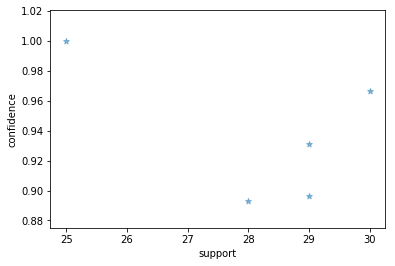

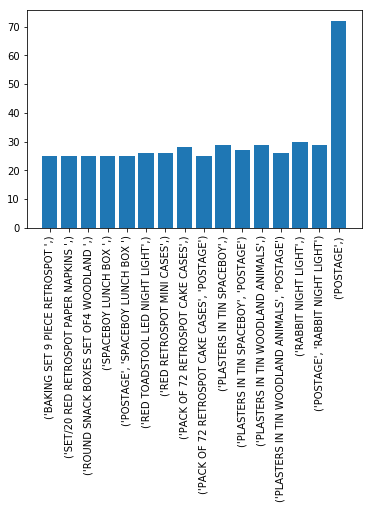

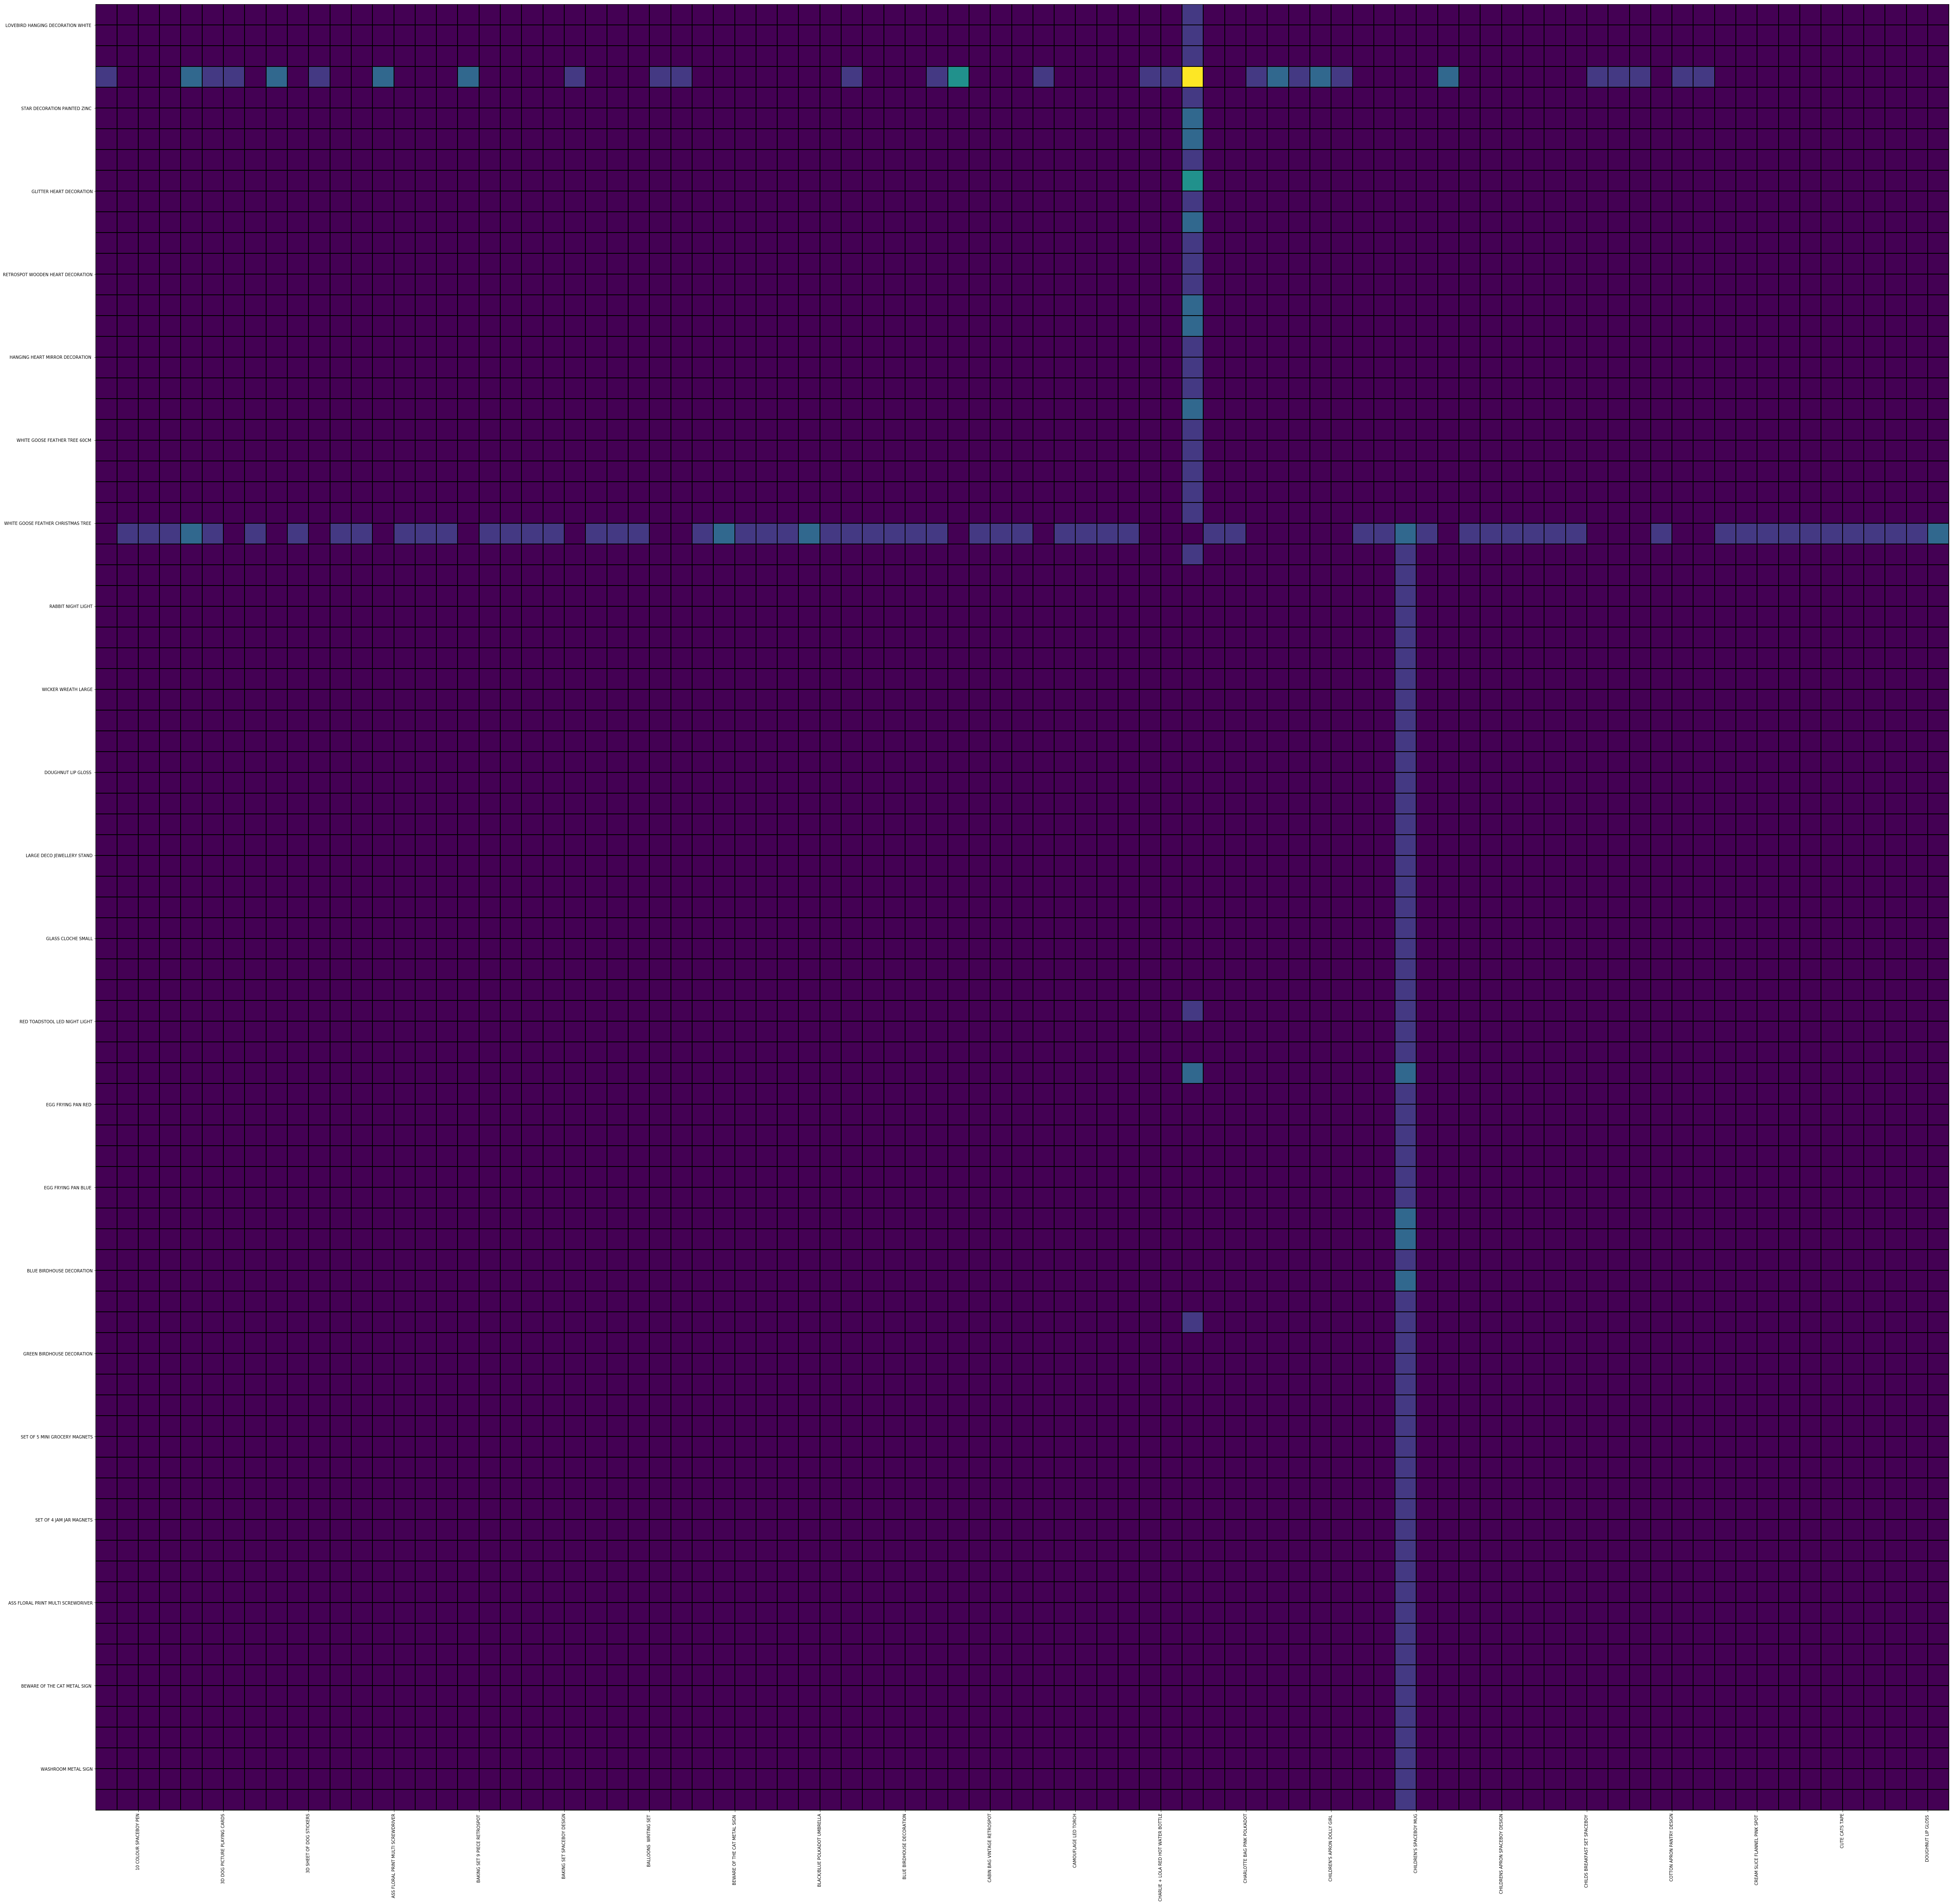

In [4]:

#Afficher la variation de support en fonction de la variation de la confidence
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

#Afficher les motifs fréquents en fonction de support
plt.bar(range(len(patterns)), list(patterns.values()), align='center')
plt.xticks(range(len(patterns)), list(patterns.keys()))
plt.xticks(rotation=90)
plt.show()


#Faire un heat map pour distinguer les produits frequement vendus ensemble (On peut pas prendre toute la base 
#vue la quantité enorme de de données qu'on a)


reshG = FranceSales.groupby(by="CustomerID")["Description"]
data2 = []
for CustomerID , iterator in reshG:
    data2.append(iterator.values)
    if(len(data2)>1): break
# Convert the input into a 2D dictionary
freqMap = {}
for line in data2:
    for item in line:
        if not item in freqMap:
            freqMap[item] = {}
    for other_item in line:
        if not other_item in freqMap:
            freqMap[other_item] = {}
        freqMap[item][other_item] = freqMap[item].get(other_item, 0) + 1
        freqMap[other_item][item] = freqMap[other_item].get(item, 0) + 1
df = pd.DataFrame(freqMap).T.fillna(0)
#####
# Create the plot
#####
plt.figure(figsize=(80,80))
plt.pcolormesh(df, edgecolors='black')
plt.yticks(np.arange(2, len(df.index), 4), df.index)
plt.xticks(np.arange(2, len(df.columns), 4), df.columns)
plt.xticks(rotation=90)
plt.savefig('plot.png')



IndexError: list index out of range

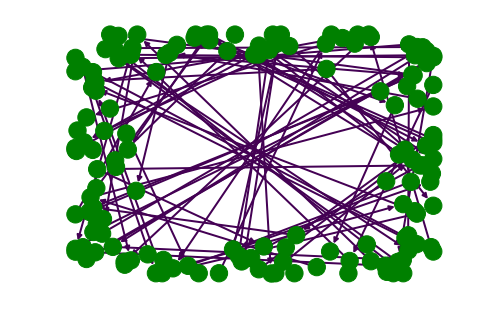

In [5]:
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
    for key in rules.keys():
        G1.add_nodes_from(["R"])
        for a in key:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(2), color=colors[2] , weight = 2)
        for c in (rules[key])[0]:
            G1.add_nodes_from("")
            G1.add_edge("R"+str(2), c, color=colors[2],  weight=2)
        for node in G1:
            found_a_string = False
            for item in strs:
                if node==item:
                    found_a_string = True
                if found_a_string:
                    color_map.append('yellow')
                else:
                    color_map.append('green')
                    edges = G1.edges()
                    colors = [G1[u][v]['color'] for u,v in edges]
                    weights = [G1[u][v]['weight'] for u,v in edges]
                    pos = nx.spring_layout(G1, k=16, scale=1)
                    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()
    
draw_graph(rules, 4)

In [ ]:
resGD = FranceSales[["CustomerID","Description","Quantity","UnitPrice"]]
resGDF = resGD.groupby(by="CustomerID")
TransactionDictionnaryList=[]
Profit={}
for CustomerID , iterator in resGDF:
    BookI = {}
    ListTransCli = iterator.values
    for items in ListTransCli:
        if(items[1] not in BookI ): BookI[items[1]] = items[2]
        else: BookI[items[1]] = items[2]
        if(items[1] not in Profit): Profit[items[1]] = items[3]
    TransactionDictionnaryList.append(BookI)



TU = []
def FHM(List ,  Treshlold , profit):
    print(" ----------------------------- frequent Itemsets Are: -------------------------------------\n")
    TWU = {}
    UtilityList={}
    for i in range (len(List)):
        value = 0 ;
        for cle in List[i].keys():
            value += List[i].get(cle) * profit.get(cle)
            if cle in UtilityList: UtilityList[cle].append((i,List[i].get(cle) * profit.get(cle),1))
            else: UtilityList[cle] = [(i,List[i].get(cle) * profit.get(cle),1)]
        for cle in List[i].keys():
            if cle in TWU: TWU[cle]+=value
            else: TWU[cle] = value
            #Lenghtt = list(UtilityList[cle][-1])
            #Lenghtt[-1] = value -  Lenghtt[1]
            #UtilityList[cle][-1] = tuple(Lenghtt)
        TU.append(value)
       
    PruningDic = dict(TWU)
    for cle in TWU.keys():
        if(TWU.get(cle) < Treshlold):  del PruningDic[cle]
    TWU = PruningDic
    TWUListSorted = sorted(TWU.items(), key=operator.itemgetter(1))
    #TWU = collections.OrderedDict(sorted(PruningDic.items(), key=lambda t: t[1]))
    #print(UtilityList)
    #print(TWUListSorted)
    
    for cle in UtilityList.keys():
        
        for i in range (len(List)):
            if cle in List[i].keys():
                lock  = 0
                value = 0
                for ite in range (len(TWUListSorted)):
                    if(TWUListSorted[ite][0] == cle or lock == 1): 
                        lock = 1
                        if((TWUListSorted[ite][0] != cle) & (TWUListSorted[ite][0] in List[i])):
                            value += profit.get(TWUListSorted[ite][0])*List[i].get(TWUListSorted[ite][0])
                for det in range (len(UtilityList[cle])):
                    if(UtilityList[cle][det][0] == i):
                        lst = list(UtilityList[cle][det])
                        lst[2] = value
                        UtilityList[cle][det] = tuple(lst)
            
    #print(UtilityList)
                            
    EUCS = ()
    AllDuos = list(itertools.combinations(TWU.keys(), 2))
    for j in range (len(AllDuos)):
        Somme = 0
        for i in range (len(List)):
            if((AllDuos[j][0] in List[i]) & (AllDuos[j][1] in List[i])): Somme += TU[i]
        AllDuos[j] = AllDuos[j] + (Somme,)
    Search('',TWU.keys(),Treshlold,EUCS,UtilityList,TWUListSorted)
            
def Ordered(Clex , CleY , ListOrdered , P): 
    X = Clex[len(P):len(Clex)]
    Y= CleY[len(P):len(CleY)]
    ClexFound = 0
    CleYFound = 0
    for i in range (len(ListOrdered)):
        if( (X==ListOrdered[i][0]) & (X!=Y)): 
            ClexFound = 1
            break
        if( (Y==ListOrdered[i][0])&(X!=Y)): 
            CleYFound = 1
            break
    if(ClexFound == 1): return True
    if(CleYFound == 1): return False
    else: return False
    
    
            
def TreshHoldVerification(cleX ,cleY ,EUCS,P):
    return True
    

def Search(P,DictionnaryOfExtensionItems,MinTreshhold,EUCS,UtilityList,TWUlistSort):
    for cleX in DictionnaryOfExtensionItems:
        sommeUtil = 0
        sommeUtilR=0
        for i in range(len(UtilityList[cleX])):
            sommeUtil +=  UtilityList[cleX][i][1]
        if(sommeUtil >= MinTreshhold): print(cleX)
        for ii in range(len(UtilityList[cleX])):
            sommeUtilR += UtilityList[cleX][ii][2]
        if((sommeUtil+sommeUtilR) >= MinTreshhold):
            ExtensionsOfPx = []
            for cleY in DictionnaryOfExtensionItems:
                if((Ordered(cleX , cleY,TWUlistSort,P)) & (TreshHoldVerification(cleX , cleY, EUCS,P))):
                    foo = cleX + cleY
                    CleXY = ''.join(ch for ch, _ in itertools.groupby(foo))
                    UtilityList[CleXY]=Construct(P,cleX,cleY,UtilityList)
                    ExtensionsOfPx.append(CleXY)
            Search(cleX,ExtensionsOfPx,MinTreshhold,EUCS,UtilityList,TWUlistSort)

def Construct(P,PX,PY,UtilityList):
    tupleToadd=()
    UtilityListOfPxy=[]
    for i in range(len(UtilityList[PX])):
        for j in range(len(UtilityList[PY])):
            if(UtilityList[PX][i][0] == UtilityList[PY][j][0]):
                if(P in UtilityList):
                    for k in range(len(UtilityList[P])):
                        if(UtilityList[P][k][0]==UtilityList[PX][i][0]): tupleToadd=(UtilityList[PX][i][0],(UtilityList[PX][i][1]+UtilityList[PY][j][1]-UtilityList[P][k][1]),UtilityList[PY][j][2])
                elif(P not in UtilityList): tupleToadd = (UtilityList[PX][i][0],(UtilityList[PX][i][1]+UtilityList[PY][j][1]),UtilityList[PY][j][2])
                UtilityListOfPxy.append(tupleToadd)
    return UtilityListOfPxy


FHM(TransactionDictionnaryList , 3000 , Profit)

 ----------------------------- frequent Itemsets Are: -------------------------------------

RABBIT NIGHT LIGHT
RABIT NIGHT LIGHTPLASTERS IN TIN SPACEBOY
RABIT NIGHT LIGHTPOSTAGE
